In [1]:
import backend.algorithms as algo
import backend.data_gen as data_gen
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib as mpl
import pandas as pd
mpl.rcParams['figure.dpi'] = 100

In [54]:
sites_dict = ['111','112','113','121','122','123','131','132','133','211','212','213','221','222','223','231','232','233','311','312','313','321','322','323','331','332','333']
sites2 = ['2_1000','2_2000','2_4000','2_8000','2_10000', '2_20000', '2_40000', '2_80000', '2_160000']
sites5 = ['5_1000','5_2000','5_4000','5_8000','5_10000', '5_20000', '5_40000', '5_80000', '5_160000']
sites10 = ['10_1000','10_2000','10_4000','10_8000','10_10000', '10_20000', '10_40000', '10_80000', '10_160000']
sites20 = ['20_1000','20_2000','20_4000','20_8000','20_10000', '20_20000', '20_40000', '20_80000', '20_160000']
budgets_labels = ['1k','2k','4k','8k','10k','20k','40k','80k','160k']
x = [0,1,2,3,4,5,6,7,8]
xi = ['1k','2k','4k','8k','10k','20k','40k','80k','160k']

In [107]:
number_of_sites = [2,5,10,20]
budgets = [1000,2000,4000,8000,10000,20000,40000,80000,160000]
simpel_regrets_se = {}
simpel_regrets_best_se = {}
site_lengths_se = {}

for site in number_of_sites:
    for budget in budgets:
        with open(f"SE/{site}_{budget}.obj", "rb") as input_file:
            simpel_regret_se,simpel_regret_best_only_se,remaining_sites_length_se= pickle.load(input_file)
            simpel_regrets_se[f"{site}_{budget}"] = simpel_regret_se
            simpel_regrets_best_se[f"{site}_{budget}"] = simpel_regret_best_only_se
            site_lengths_se[f"{site}_{budget}"] = remaining_sites_length_se


simpel_regrets_ugap = {}
simpel_regrets_best_ugap = {}
site_lengths_ugap = {}

for site in number_of_sites:
    for budget in budgets:
        with open(f"UGAP/{site}_{budget}.obj", "rb") as input_file:
            simpel_regret_ugap,simpel_regret_best_only_ugap,remaining_sites_length_ugap= pickle.load(input_file)
            simpel_regrets_ugap[f"{site}_{budget}"] = simpel_regret_ugap
            simpel_regrets_best_ugap[f"{site}_{budget}"] = simpel_regret_best_only_ugap
            site_lengths_ugap[f"{site}_{budget}"] = remaining_sites_length_ugap

small_budgets = [1000,2000,4000,8000,10000]

simpel_regrets_ugap_1 = {}
simpel_regrets_best_ugap_1 = {}
site_lengths_ugap_1 = {}

for site in number_of_sites:
    for budget in small_budgets:
        with open(f"UGAP_1_return/{site}_{budget}.obj", "rb") as input_file:
            simpel_regret_ugap_1,simpel_regret_best_only_ugap_1,remaining_sites_length_ugap_1= pickle.load(input_file)
            simpel_regrets_ugap_1[f"{site}_{budget}"] = simpel_regret_ugap_1
            simpel_regrets_best_ugap_1[f"{site}_{budget}"] = simpel_regret_best_only_ugap_1
            site_lengths_ugap_1[f"{site}_{budget}"] = remaining_sites_length_ugap_1

Counting correct

In [126]:
correct_site_ugap_1 = pd.DataFrame(columns=['Correct 2 sites','Correct 5 sites','Correct 10 sites','Correct 20 sites'])

for idx in range(5):
    correct_site_ugap_1 = correct_site_ugap_1.append({
    'Correct 2 sites' : simpel_regrets_ugap_1.get(sites2[idx]).count(0),
    'Correct 5 sites' : simpel_regrets_ugap_1.get(sites5[idx]).count(0),
    'Correct 10 sites' : simpel_regrets_ugap_1.get(sites10[idx]).count(0),
    'Correct 20 sites' : simpel_regrets_ugap_1.get(sites20[idx]).count(0)
    }, ignore_index=True
    )

correct_site_se = pd.DataFrame(columns=['Correct 2 sites','Correct 5 sites','Correct 10 sites','Correct 20 sites'])

for idx in range(9):
    correct_site_se = correct_site_se.append({
    'Correct 2 sites' : simpel_regrets_se.get(sites2[idx]).count(0),
    'Correct 5 sites' : simpel_regrets_se.get(sites5[idx]).count(0),
    'Correct 10 sites' : simpel_regrets_se.get(sites10[idx]).count(0),
    'Correct 20 sites' : simpel_regrets_se.get(sites20[idx]).count(0)
    }, ignore_index=True
    )

Text(0, 0.5, 'Percentage correct')

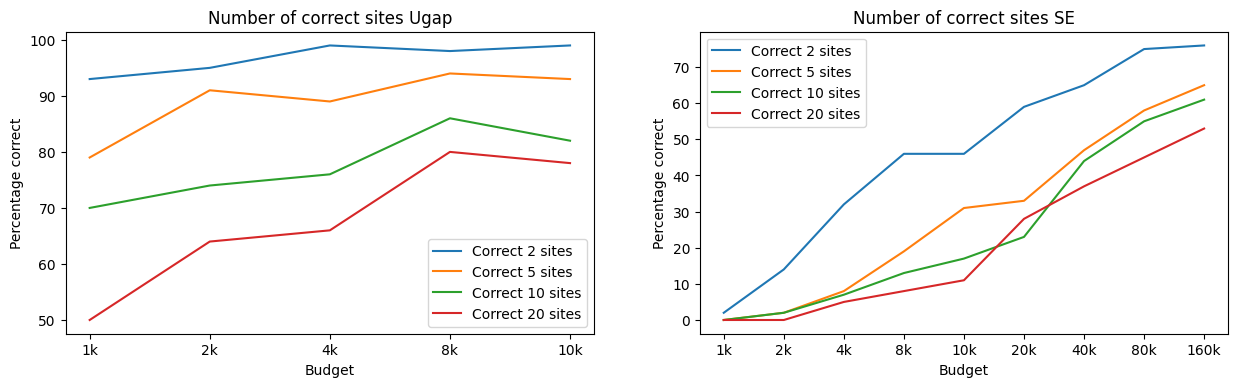

In [127]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
plot = correct_site_ugap_1.plot(ax=axes[0])
plot.set_xticks(x[:5],xi[:5])
plot.set_title('Number of correct sites Ugap')
plot.set_xlabel('Budget')
plot.set_ylabel('Percentage correct')

plot = correct_site_se.plot(ax=axes[1])
plot.set_xticks(x[:10],xi[:10])
plot.set_title('Number of correct sites SE')
plot.set_xlabel('Budget')
plot.set_ylabel('Percentage correct')

/var/folders/p6/vksmx8hn3ysfnwgq9pq63dm40000gn/T/ipykernel_6068/89474557.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Data generation

In [4]:
total = []
for i in range(100):
    website_data = list(data_gen.generate_data(1000,sites_dict[:25],0.07,0.12,0.08).values())
    for site in website_data:
        total.append(site.p)

Text(0, 0.5, 'Number of data points')

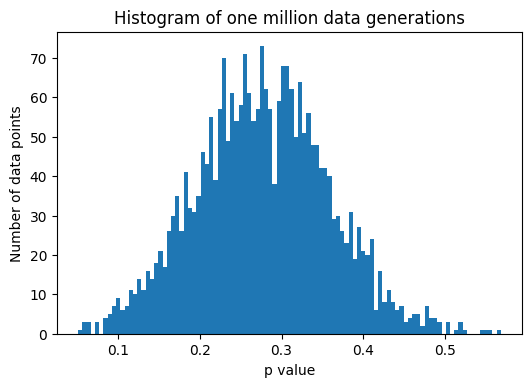

In [5]:
plt.figure(dpi=100)
plt.hist(total,bins=100);
plt.title('Histogram of one million data generations')
plt.xlabel('p value')
plt.ylabel('Number of data points')

Sitse

In [7]:
for site in sites2:
    print(site.split('_')[0],'sites with budget',site.split('_')[1],'gets sum regret', round(np.sum(simpel_regrets_se.get(site)),2))

2 sites with budget 1000 gets sum regret 7.59
2 sites with budget 2000 gets sum regret 6.88
2 sites with budget 4000 gets sum regret 4.53
2 sites with budget 8000 gets sum regret 2.82
2 sites with budget 10000 gets sum regret 2.34
2 sites with budget 20000 gets sum regret 1.33
2 sites with budget 40000 gets sum regret 0.87
2 sites with budget 80000 gets sum regret 0.51
2 sites with budget 160000 gets sum regret 0.35


In [8]:
simpel_regret_sum = pd.DataFrame(columns=['Budget','Simpel regret 2 sites','Simpel regret 5 sites','Simpel regret 10 sites','Simpel regret 20 sites'])

for idx, site in enumerate(sites2):
    simpel_regret_sum = simpel_regret_sum.append({'Budget':site.split('_')[1], 
    'Simpel regret 2 sites':round(np.sum(simpel_regrets_se.get(sites2[idx])),2),
    'Simpel regret 5 sites':round(np.sum(simpel_regrets_se.get(sites5[idx])),2),
    'Simpel regret 10 sites':round(np.sum(simpel_regrets_se.get(sites10[idx])),2),
    'Simpel regret 20 sites':round(np.sum(simpel_regrets_se.get(sites20[idx])),2)
    }
    
    , ignore_index=True)

Text(0, 0.5, 'Sum of simpel regret')

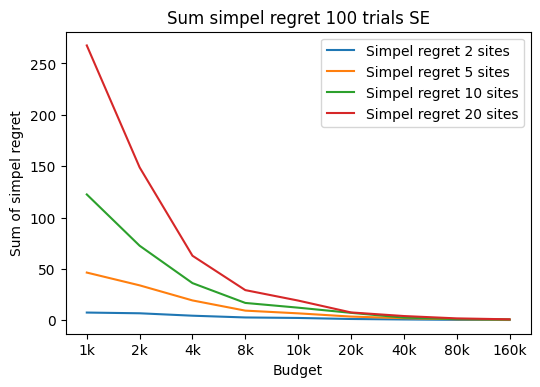

In [9]:
plot = simpel_regret_sum.plot()

plot.set_xticks(x,xi)
plot.set_title('Sum simpel regret 100 trials SE')
plot.set_xlabel('Budget')
plot.set_ylabel('Sum of simpel regret')

Text(0, 0.5, 'Sum of simpel regret')

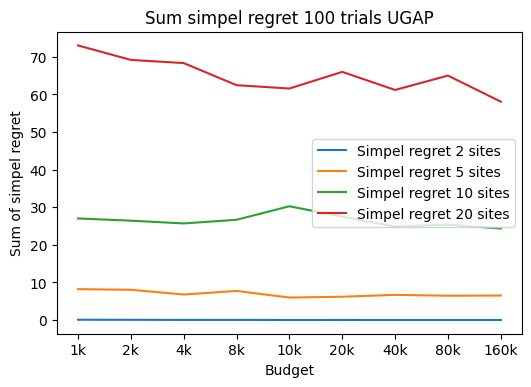

In [10]:
simpel_regret_sum = pd.DataFrame(columns=['Budget','Simpel regret 2 sites','Simpel regret 5 sites','Simpel regret 10 sites','Simpel regret 20 sites'])

for idx, site in enumerate(sites2):
    simpel_regret_sum = simpel_regret_sum.append({'Budget':site.split('_')[1], 
    'Simpel regret 2 sites':round(np.sum(simpel_regrets_ugap.get(sites2[idx])),2),
    'Simpel regret 5 sites':round(np.sum(simpel_regrets_ugap.get(sites5[idx])),2),
    'Simpel regret 10 sites':round(np.sum(simpel_regrets_ugap.get(sites10[idx])),2),
    'Simpel regret 20 sites':round(np.sum(simpel_regrets_ugap.get(sites20[idx])),2)
    }
    
    , ignore_index=True)

plot = simpel_regret_sum.plot()

plot.set_xticks(x,xi)
plot.set_title('Sum simpel regret 100 trials UGAP')
plot.set_xlabel('Budget')
plot.set_ylabel('Sum of simpel regret')

Text(0, 0.5, 'Sum of simpel regret')

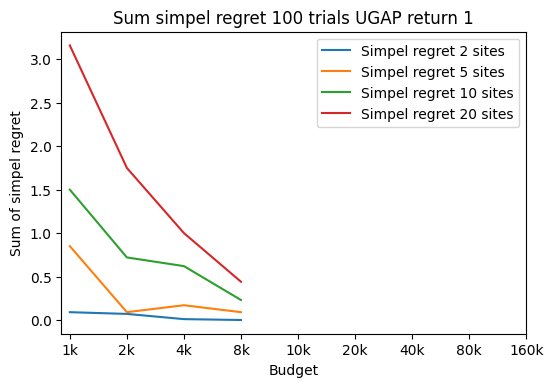

In [11]:
simpel_regret_sum = pd.DataFrame(columns=['Budget','Simpel regret 2 sites','Simpel regret 5 sites','Simpel regret 10 sites','Simpel regret 20 sites'])

for idx, site in enumerate(sites2[:4]):
    simpel_regret_sum = simpel_regret_sum.append({'Budget':site.split('_')[1], 
    'Simpel regret 2 sites':round(np.sum(simpel_regrets_ugap_1.get(sites2[idx])),2),
    'Simpel regret 5 sites':round(np.sum(simpel_regrets_ugap_1.get(sites5[idx])),2),
    'Simpel regret 10 sites':round(np.sum(simpel_regrets_ugap_1.get(sites10[idx])),2),
    'Simpel regret 20 sites':round(np.sum(simpel_regrets_ugap_1.get(sites20[idx])),2)
    }
    
    , ignore_index=True)

plot = simpel_regret_sum.plot()

plot.set_xticks(x,xi)
plot.set_title('Sum simpel regret 100 trials UGAP return 1')
plot.set_xlabel('Budget')
plot.set_ylabel('Sum of simpel regret')

Text(0, 0.5, 'Sum of simpel regret')

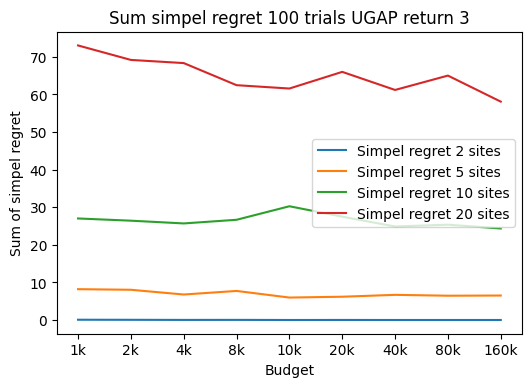

In [12]:
simpel_regret_sum = pd.DataFrame(columns=['Budget','Simpel regret 2 sites','Simpel regret 5 sites','Simpel regret 10 sites','Simpel regret 20 sites'])

for idx, site in enumerate(sites2):
    simpel_regret_sum = simpel_regret_sum.append({'Budget':site.split('_')[1], 
    'Simpel regret 2 sites':round(np.sum(simpel_regrets_ugap.get(sites2[idx])),2),
    'Simpel regret 5 sites':round(np.sum(simpel_regrets_ugap.get(sites5[idx])),2),
    'Simpel regret 10 sites':round(np.sum(simpel_regrets_ugap.get(sites10[idx])),2),
    'Simpel regret 20 sites':round(np.sum(simpel_regrets_ugap.get(sites20[idx])),2)
    }
    
    , ignore_index=True)

plot = simpel_regret_sum.plot()

plot.set_xticks(x,xi)
plot.set_title('Sum simpel regret 100 trials UGAP return 3')
plot.set_xlabel('Budget')
plot.set_ylabel('Sum of simpel regret')

<function matplotlib.pyplot.show(close=None, block=None)>

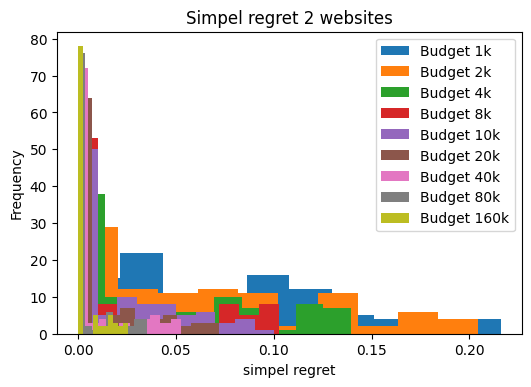

In [13]:
for idx, site in enumerate(sites2):
    plt.hist(simpel_regrets_se.get(site),label = f'Budget {budgets_labels[idx]}')
plt.legend()
plt.title('Simpel regret 2 websites')
plt.xlabel('simpel regret')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

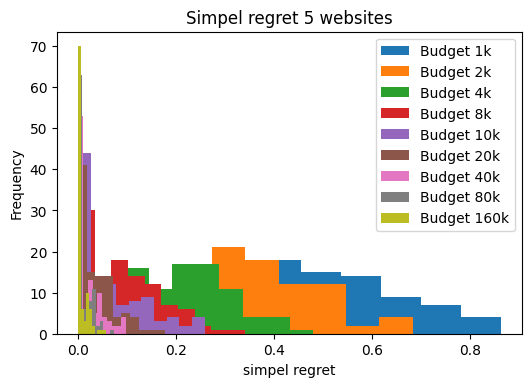

In [14]:
for idx, site in enumerate(sites5):
    plt.hist(simpel_regrets_se.get(site),label = f'Budget {budgets_labels[idx]}')
plt.legend()
plt.title('Simpel regret 5 websites')
plt.xlabel('simpel regret')
plt.ylabel('Frequency')
plt.show

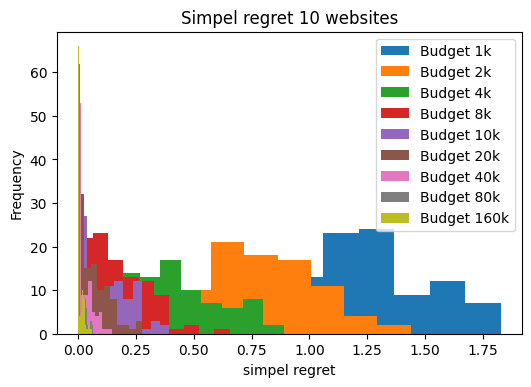

In [15]:
for idx, site in enumerate(sites10):
    plt.hist(simpel_regrets_se.get(site),label = f'Budget {budgets_labels[idx]}')
plt.legend()
plt.title('Simpel regret 10 websites')
plt.xlabel('simpel regret')
plt.ylabel('Frequency')
plt.show()

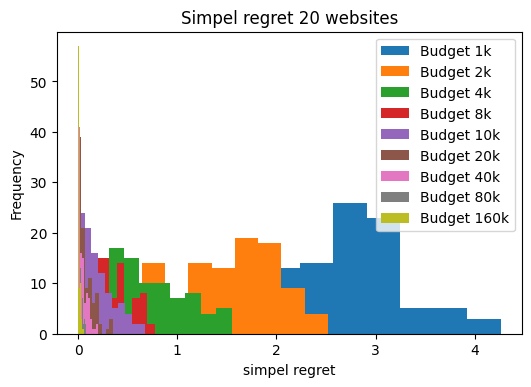

In [16]:
for idx, site in enumerate(sites20):
    plt.hist(simpel_regrets_se.get(site),label = f'Budget {budgets_labels[idx]}')
plt.legend()
plt.title('Simpel regret 20 websites')
plt.xlabel('simpel regret')
plt.ylabel('Frequency')
plt.show()

In [17]:
count_0_site2 = []
for site in sites2:
    count_0_site2.append(simpel_regrets_se.get(site).count(0))

count_0_site5 = []
for site in sites5:
    count_0_site5.append(simpel_regrets_se.get(site).count(0))

count_0_site10 = []
for site in sites10:
    count_0_site10.append(simpel_regrets_se.get(site).count(0))

count_0_site20 = []
for site in sites20:
    count_0_site20.append(simpel_regrets_se.get(site).count(0))

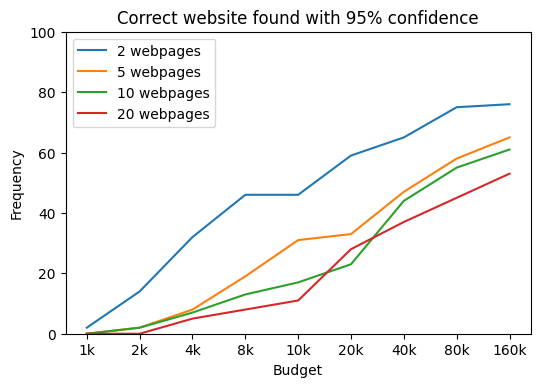

In [18]:
plt.plot(count_0_site2,label='2 webpages')
plt.plot(count_0_site5,label='5 webpages')
plt.plot(count_0_site10,label='10 webpages')
plt.plot(count_0_site20,label='20 webpages')
plt.legend()
plt.ylabel('Frequency')
x = [0,1,2,3,4,5,6,7,8]
xi = ['1k','2k','4k','8k','10k','20k','40k','80k','160k']
plt.xticks(x,xi);
plt.xlabel('Budget')
plt.ylim(0,100)
plt.title('Correct website found with 95% confidence')
plt.show()


In [19]:
count_0_site2_best_se = []
for site in sites2:
    count_0_site2_best_se.append(simpel_regrets_best_se.get(site).count(0))

count_0_site5_best_se = []
for site in sites5:
    count_0_site5_best_se.append(simpel_regrets_best_se.get(site).count(0))

count_0_site10_best_se = []
for site in sites10:
    count_0_site10_best_se.append(simpel_regrets_best_se.get(site).count(0))

count_0_site20_best_se = []
for site in sites20:
    count_0_site20_best_se.append(simpel_regrets_best_se.get(site).count(0))

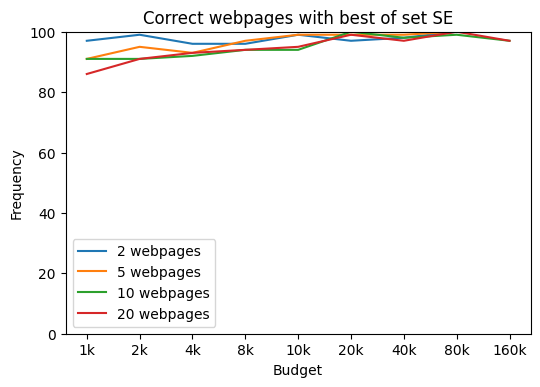

In [20]:
plt.plot(count_0_site2_best_se,label='2 webpages')
plt.plot(count_0_site5_best_se,label='5 webpages')
plt.plot(count_0_site10_best_se,label='10 webpages')
plt.plot(count_0_site20_best_se,label='20 webpages')
plt.legend()
plt.ylabel('Frequency')
plt.xticks(x,xi);
plt.xlabel('Budget')
plt.ylim(0,100)
plt.title('Correct webpages with best of set SE')
plt.show()
#Deze plot kijkt naar de beste van de gereturnde sites

36
36
20


0.0